In [1]:
import time
import os
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import pickle
from numpy import array


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict
from sklearn.utils.class_weight import compute_class_weight


from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance


#Model Performance Evaluators
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score

from sklearn.datasets import make_classification
from sklearn.metrics import log_loss
from joblib import parallel_backend
from joblib import Parallel, delayed



import matplotlib.pyplot as plt
import numpy as np


import dask
from dask.distributed import Client, progress, LocalCluster, SSHCluster,wait
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from PyALE import ale

In [6]:
print('loading model >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')


mfilename='/cluster/pixstor/slotkinr-lab/sandaruwan/rubyRF/RED_FG/RED_FG_models/rfc_RED_FG_comb_tr4_v1.pkl'
# load the model from disk
rfc_v1 = pickle.load(open(mfilename, 'rb'))

loading model >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [7]:
print('loading data >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')

comb_df= pd.read_csv('/cluster/pixstor/slotkinr-lab/sandaruwan/frNAnet/prediction/comb_data/S030813_dinuc_pct_df.txt',header=0,sep='\t')


print('input shape: >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
np.shape(comb_df)


shuf_comb_df=comb_df.iloc[np.random.permutation(len(comb_df))]



shuf_comb_df=shuf_comb_df.reset_index(drop=True)

shuf_comb_df.info()

loading data >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
input shape: >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711578 entries, 0 to 711577
Data columns (total 25 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   seq_id   711578 non-null  object 
 1   5p       711578 non-null  int64  
 2   3p       711578 non-null  int64  
 3   strand   711578 non-null  int64  
 4   nblc     711578 non-null  int64  
 5   pct      711578 non-null  float64
 6   ptype    711578 non-null  int64  
 7   length   711578 non-null  int64  
 8   gc_cont  711578 non-null  float64
 9   AA       711578 non-null  int64  
 10  AC       711578 non-null  int64  
 11  AG       711578 non-null  int64  
 12  AT       711578 non-null  int64  
 13  CA       711578 non-null  int64  
 14  CC       711578 non-null  int64  
 15  CG       711578 non-null  int64  
 16  CT       711578 non-null  int64  
 17  GA       711578 non-null  int64  
 18  GC

In [8]:
ydt=shuf_comb_df['ptype']
xdt=shuf_comb_df.drop(['seq_id','ptype'],axis=1)


In [9]:
with parallel_backend('threading',n_jobs=64 ):

    print('prediction >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    
    y_pred = rfc_v1.predict(xdt)




prediction >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [10]:
# test accuracy score 

from sklearn.metrics import accuracy_score

print('prediction accuracy score : {0:0.4f}'. format(accuracy_score(ydt, y_pred)))



print ("\nClassification report :\n",(classification_report(ydt,y_pred)))



prediction accuracy score : 0.8194

Classification report :
               precision    recall  f1-score   support

           0       0.85      0.89      0.87    493694
           1       0.73      0.65      0.69    217884

    accuracy                           0.82    711578
   macro avg       0.79      0.77      0.78    711578
weighted avg       0.82      0.82      0.82    711578



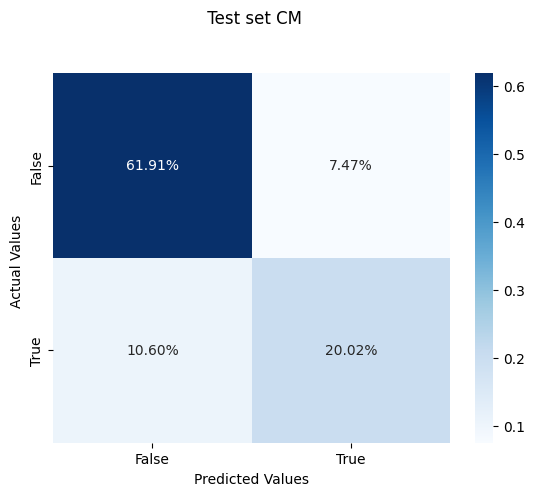

In [11]:
# #####################################  CONFUSION MATRIX for test set   ########################################################################
fig1=plt.figure()
cm = confusion_matrix(y_true=ydt, y_pred=y_pred)

ax = sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

ax.set_title(' Test set CM\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


fig1 = ax.get_figure()

fig1.savefig("RFC_ARFG_S030813_pred.pdf")